In [8]:
import pandas as pd
import numpy as np
data = pd.read_csv('./data/data.csv')
data.head()

,X1,X2,label
0,2.072345,-3.241693,0
1,17.936710,15.784810,0
2,1.083576,7.319176,0
3,11.120670,14.406780,0
4,23.711550,2.557729,0


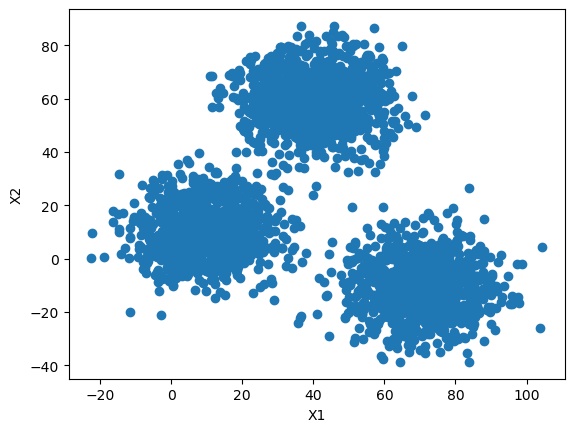

In [9]:
from matplotlib import pyplot as plt
fig1 = plt.figure()
plt.scatter(data.loc[:,'X1'],data.loc[:,'X2'])
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [10]:
X = data.drop(['label'], axis=1)
y = data.loc[:, 'label']

pd.value_counts(y)

2    1156
1     954
0     890
Name: label, dtype: int64

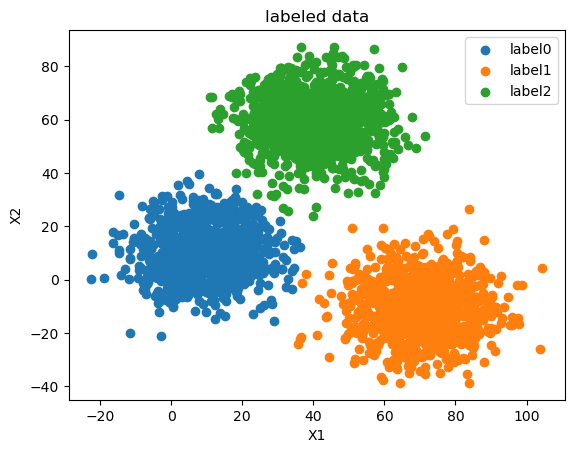

In [15]:
fig1 = plt.figure()
label0 = plt.scatter(data.loc[:,'X1'][y==0],data.loc[:,'X2'][y==0])
label1 = plt.scatter(data.loc[:,'X1'][y==1],data.loc[:,'X2'][y==1])
label2 = plt.scatter(data.loc[:,'X1'][y==2],data.loc[:,'X2'][y==2])

plt.title("labeled data")
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend((label0,label1,label2),('label0','label1','label2'))
plt.show()

In [16]:
from sklearn.cluster import KMeans
kmean = KMeans(n_clusters=3, random_state=0)
kmean.fit(X)

/Users/keke/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [17]:
centers = kmean.cluster_centers_

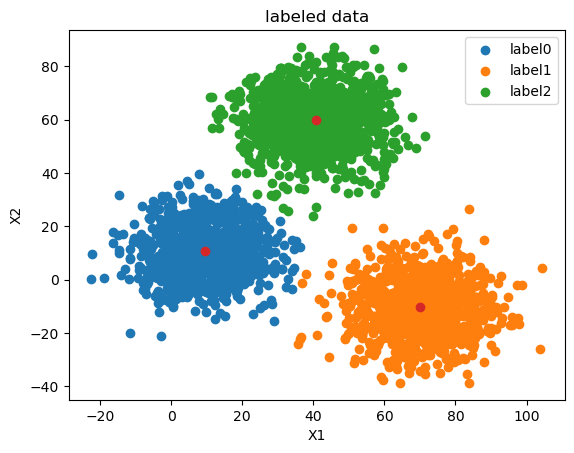

In [18]:
fig1 = plt.figure()
label0 = plt.scatter(data.loc[:,'X1'][y==0],data.loc[:,'X2'][y==0])
label1 = plt.scatter(data.loc[:,'X1'][y==1],data.loc[:,'X2'][y==1])
label2 = plt.scatter(data.loc[:,'X1'][y==2],data.loc[:,'X2'][y==2])

plt.title("labeled data")
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend((label0,label1,label2),('label0','label1','label2'))
plt.scatter(centers[:,0],centers[:,1])
plt.show()

In [19]:
#test data: V1=80,V2=60
y_predict_test = kmean.predict([[80,60]])
print(y_predict_test)

[1]


/Users/keke/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [20]:
from sklearn.metrics import accuracy_score
y_predict = kmean.predict(X)
accuracy = accuracy_score(y, y_predict)
print(accuracy)

0.0023333333333333335


In [21]:
#correct the results
y_corrected = []
for i in y_predict:
    if i==0:
        y_corrected.append(1)
    elif i==1:
        y_corrected.append(2)
    else:
        y_corrected.append(0)
print(pd.value_counts(y_corrected),pd.value_counts(y))

2    1149
1     952
0     899
dtype: int64 2    1156
1     954
0     890
Name: label, dtype: int64


In [22]:
print(accuracy_score(y,y_corrected))

0.997


In [26]:
# print(y_corrected.shape) # 本来是list

y_corrected = np.array(y_corrected)
print(y_corrected.shape)

(3000,)
